In [27]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import numba

In [28]:
@np.vectorize
@numba.jit
def NumericalDiff(f: Callable[[float], float], x: float, h: float = 0.01, order: float = 1, h_order: int = 2, type: str = 'central') -> float:
    """Возращает производную в точке"""
    if order == 1: # 1 производная
        if h_order == 2:
            if type == 'central':
                return (f(x + h) - f(x - h)) / (2 * h)
            if type == 'backward':
                return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/(2 * h)
            if type == 'forward':
                return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h))/(2 * h)
        elif h_order == 4:
            if type == 'central':
                return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h))/(12 * h)
    elif order == 2: # 2 производная
        if h_order == 2:
            if type == 'central':
                return (f(x + h) - 2 * f(x) + f(x - h))/(h ** 2)
        elif h_order == 4:
            if type == 'central':
                return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * np.power(h, 2))

In [29]:
@np.vectorize
@numba.jit
def NumericalDiff(f: Callable[[float], float], x: float, h: float = 0.01, order: float = 1, h_order: int = 2) -> float:
    """Возращает производную в точке"""
    if order == 1:      # 1 производная
        if h_order == 2:
            return (f(x + h) - f(x - h)) / (2 * h)
    elif order == 2:    # 2 производная
        if h_order == 2:
            return (f(x + h) - 2 * f(x) + f(x - h)) / np.power(h, 2)
        elif h_order == 4:
            return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * np.power(h, 2))

In [30]:
f = lambda x: np.exp(-2*x) * np.cos(x)
df = lambda x: -np.exp(-2*x) * (np.sin(x) + 2*np.cos(x))
d2f = lambda x: np.exp(-2*x) * (4*np.sin(x) + 3*np.cos(x))
a = -0.8
b = 0.8

In [31]:
X = np.linspace(a, b, 101)

([<matplotlib.lines.Line2D at 0x7f9f6b9c4588>],
 [<matplotlib.lines.Line2D at 0x7f9f6b9c4358>])

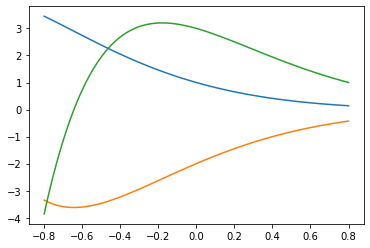

In [32]:
plt.plot(X, f(X)), plt.plot(X, df(X)), plt.plot(X, d2f(X))

<ipython-input-29-a5f4d80d56bc>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "NumericalDiff" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-29-a5f4d80d56bc> (5)

File "<ipython-input-29-a5f4d80d56bc>", line 5:
def NumericalDiff(f: Callable[[float], float], x: float, h: float = 0.01, order: float = 1, h_order: int = 2) -> float:
    <source elided>
    """Возращает производную в точке"""
    if order == 1:      # 1 производная
    ^

  @np.vectorize
/Users/alexandrboyko/PycharmProjects/numbermetods/venv/lib/python3.6/site-packages/numba/core/object_mode_passes.py:152: NumbaWarning: Function "NumericalDiff" was compiled in object mode without forceobj=True.

File "<ipython-input-29-a5f4d80d56bc>", line 3:
@numba.jit
def NumericalDiff(f: Callable[[float], float], x: float, h: float = 0.01, order: float = 1, h_order: int = 2) -> float:
^

  state.func_ir.loc))
/Users/alexandrboyk

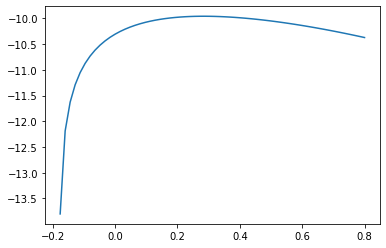

In [33]:
true_sol1 = df(X)
sol1 = NumericalDiff(f, X, h = 0.01, order = 1, h_order = 2)
plt.plot(X, np.log((true_sol1 - sol1)))

In [40]:
hs = {}
errs = {}
for order in [1, 2]:
    if order == 1:
        hs[order] = {}
        errs[order] = {}
        for h_order in [2]:
            hs[order][h_order] = []
            errs[order][h_order] = []
            for h in np.linspace(10e-3, 1, 1001):
            # for s in range(-4, 1, 1):
            #     h = 10 ** s
                X = np.arange(a, b + h, h)
                true_sol1 = df(X)
                calc_sol = NumericalDiff(f=f, x=X, h=h, order=order, h_order=h_order)
                err = np.max(np.abs(calc_sol - true_sol1))# / np.abs(true_sol))
#                 err = np.max(np.abs(calc_sol - true_sol))
                hs[order][h_order].append(np.log(h))
                errs[order][h_order].append(np.log(err))
    elif order == 2:
        hs[order] = {}
        errs[order] = {}
        for h_order in [2, 4]:
            hs[order][h_order] = []
            errs[order][h_order] = []
            for h in np.linspace(10e-3, 1, 1001):
            # for s in range(-4, 1, 1):
            #     h = 10 ** s
                X = np.arange(a, b + h, h)
                true_sol2 = d2f(X)
                calc_sol = NumericalDiff(f=f, x=X, h=h, order=order, h_order=h_order)
                err = np.max(np.abs(calc_sol - true_sol2))# / np.abs(true_sol))
#                 err = np.max(np.abs(calc_sol - true_sol))
                hs[order][h_order].append(np.log(h))
                errs[order][h_order].append(np.log(err))

In [36]:
(errs[1][2][-1] - errs[1][2][0]) / (hs[1][2][-1] - hs[1][2][0]), \
(errs[2][2][-1] - errs[2][2][0]) / (hs[2][2][-1] - hs[2][2][0]), \
(errs[2][4][-1] - errs[2][4][0]) / (hs[2][4][-1] - hs[2][4][0])

(2.0822661498659674, 2.0347098113006177, 4.000985313263755)

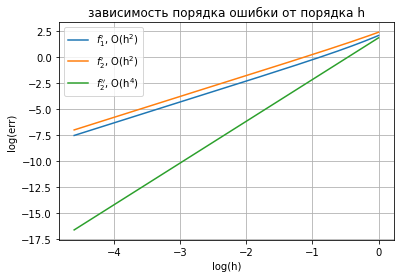

<Figure size 72000x72000 with 0 Axes>

In [22]:
plt.plot(hs[1][2], errs[1][2], label="$f_1'$, O(h$^2$)")
plt.plot(hs[2][2], errs[2][2], label="$f_2'$, O(h$^2$)")
plt.plot(hs[2][4], errs[2][4], label="$f_2''$, O(h$^4$)")
plt.grid()
plt.legend()
plt.title('зависимость порядка ошибки от порядка h')
plt.xlabel('log(h)')
plt.ylabel('log(err)')
plt.figure(figsize=(1000, 1000))
plt.show()
